## Introduction to Information Retrieval System Development

In the age of digital information, the ability to efficiently retrieve relevant documents from vast datasets is crucial for effective decision-making, research, and knowledge discovery. An Information Retrieval (IR) system plays a pivotal role in this process by enabling users to query and retrieve documents that match their information needs. This project embarks on the development of an IR system, designed to seamlessly navigate through a collection of text documents, comprehend user queries, and provide meaningful document recommendations.

# Objective

The primary objective of this project is to design and implement a robust IR system that can swiftly and accurately retrieve pertinent documents from a curated dataset. This dataset comprises documents that pertain to a specific domain, each classified into relevant categories. By adopting industry-standard practices, the project seeks to facilitate the following key steps:

## Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Importing the dataset

In [2]:
# if your dataset in the text documents

# # Define the root directory where your text documents are stored
# root_directory = 'C:/Users/User/Desktop/Navttac_Internship/bbcsport'

# # Create empty lists to store data
# documents = []
# labels = []

# # Iterate through folders and files
# for folder_name in os.listdir(root_directory):
#     folder_path = os.path.join(root_directory, folder_name)
#     if os.path.isdir(folder_path):
#         for file_name in os.listdir(folder_path):
#             if file_name.endswith('.txt'):
#                 file_path = os.path.join(folder_path, file_name)
#                 with open(file_path, 'r', encoding='utf-8') as file:
#                     document_text = file.read()
#                     documents.append(document_text)
#                     labels.append(folder_name)

# # Create a DataFrame
# data = {'Document': documents, 'Label': labels}
# data_df = pd.DataFrame(data)

# # Display the first few rows of the DataFrame
# print(data_df.head())


                                            Document      Label
0  Claxton hunting first major medal\n\nBritish h...  athletics
1  O'Sullivan could run in Worlds\n\nSonia O'Sull...  athletics
2  Greene sets sights on world title\n\nMaurice G...  athletics
3  IAAF launches fight against drugs\n\nThe IAAF ...  athletics
4  Dibaba breaks 5,000m world record\n\nEthiopia'...  athletics


In [23]:
import numpy as np
import pandas as pd

data_df=pd.read_csv('C:/Users/User/Desktop/Navttac_Internship/CNN_Articels_clean_2/CNN_Articels_clean.csv')

data_df

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...
...,...,...,...,...,...,...,...,...,...,...,...
37944,44992,"Ben Church and Aleks Klosok, CNN",2022-03-01 10:59:10,sport,sport,https://www.cnn.com/2022/03/01/sport/vladimir-...,Russian President Vladimir Putin is being stri...,Russian President Vladimir Putin has been stri...,"sport, Russian President Vladimir Putin is bei...",Vladimir Putin is being stripped of his honora...,(CNN)Russian President Vladimir Putin has bee...
37945,44993,"Tamara Qiblawi, CNN",2022-03-01 12:55:37,news,europe,https://www.cnn.com/2022/03/01/europe/nato-ukr...,"On NATO's doorstep, a former tourist hotspot i...",A long line of men snakes out of an unassuming...,"europe, On NATO's doorstep, a former tourist h...","On NATO's doorstep, a former tourist hotspot i...","Lviv, Ukraine (CNN)A long line of men snakes o..."
37946,44994,"Wayne Sterling and Steve Almasy, CNN",2022-03-01 11:54:44,sport,sport,https://www.cnn.com/2022/03/01/sport/mlb-deadl...,MLB is postponing Opening Day after owners and...,Major League Baseball (MLB) is postponing its ...,"sport, MLB is postponing Opening Day after own...",MLB is postponing Opening Day after owners and...,(CNN)Major League Baseball (MLB) is postponin...
37947,44996,CNN Editorial Research,2013-01-12 01:42:49,news,europe,https://www.cnn.com/2013/01/11/world/europe/mi...,Mikhail Gorbachev Fast Facts - CNN,"Read CNN's Fast Facts on Mikhail Gorbachev, fo...","europe, Mikhail Gorbachev Fast Facts - CNN",Mikhail Gorbachev Fast Facts,Here's a look at the life of Mikhail Gorbachev...


## Data Cleaning

In [24]:
data_df.isnull().sum()

Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       9
dtype: int64

In [26]:
data_df=data_df.dropna()

In [27]:
data_df.isnull().sum()

Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64

In [30]:
data_df=data_df[['Article text','Section']]

data_df

,Article text,Section
0,"(CNN)Right now, there's a shortage of truck d...",world
1,(CNN)Working in a factory or warehouse can me...,world
2,"(CNN)In a Hong Kong warehouse, a swarm of aut...",asia
3,The pandemic thrust the working world into a n...,success
4,New York (CNN Business)March Madness isn't jus...,investing
...,...,...
37944,(CNN)Russian President Vladimir Putin has bee...,sport
37945,"Lviv, Ukraine (CNN)A long line of men snakes o...",europe
37946,(CNN)Major League Baseball (MLB) is postponin...,sport
37947,Here's a look at the life of Mikhail Gorbachev...,europe


## EDA/Visualization

## Countplot

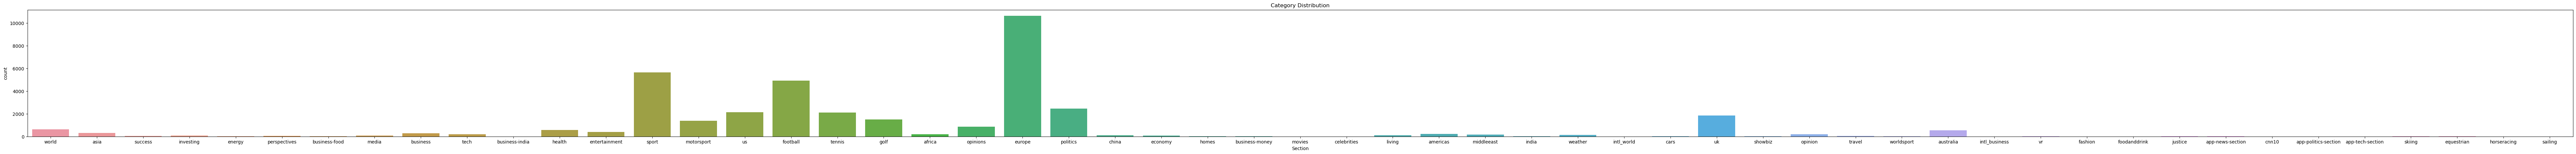

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Section distribution
plt.figure(figsize=(100 , 5))
sns.countplot(x='Section', data=data_df)
plt.title('Category Distribution')
plt.show()

## Word Frequency

In [84]:
from collections import Counter
# Apply preprocessing
data_df['Article'] = data_df['Article text'].apply(preprocess)
wc = Counter()
for words in data_df['Article text']:
    wc.update(words)

tw = wc.most_common(10)
# Separate words and counts for plotting
words = [word[0] for word in tw]
counts = [count[1] for count in tw]

# Plotting
plt.figure(figsize=(5, 4))
plt.bar(words, counts)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Article text')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Pie plot

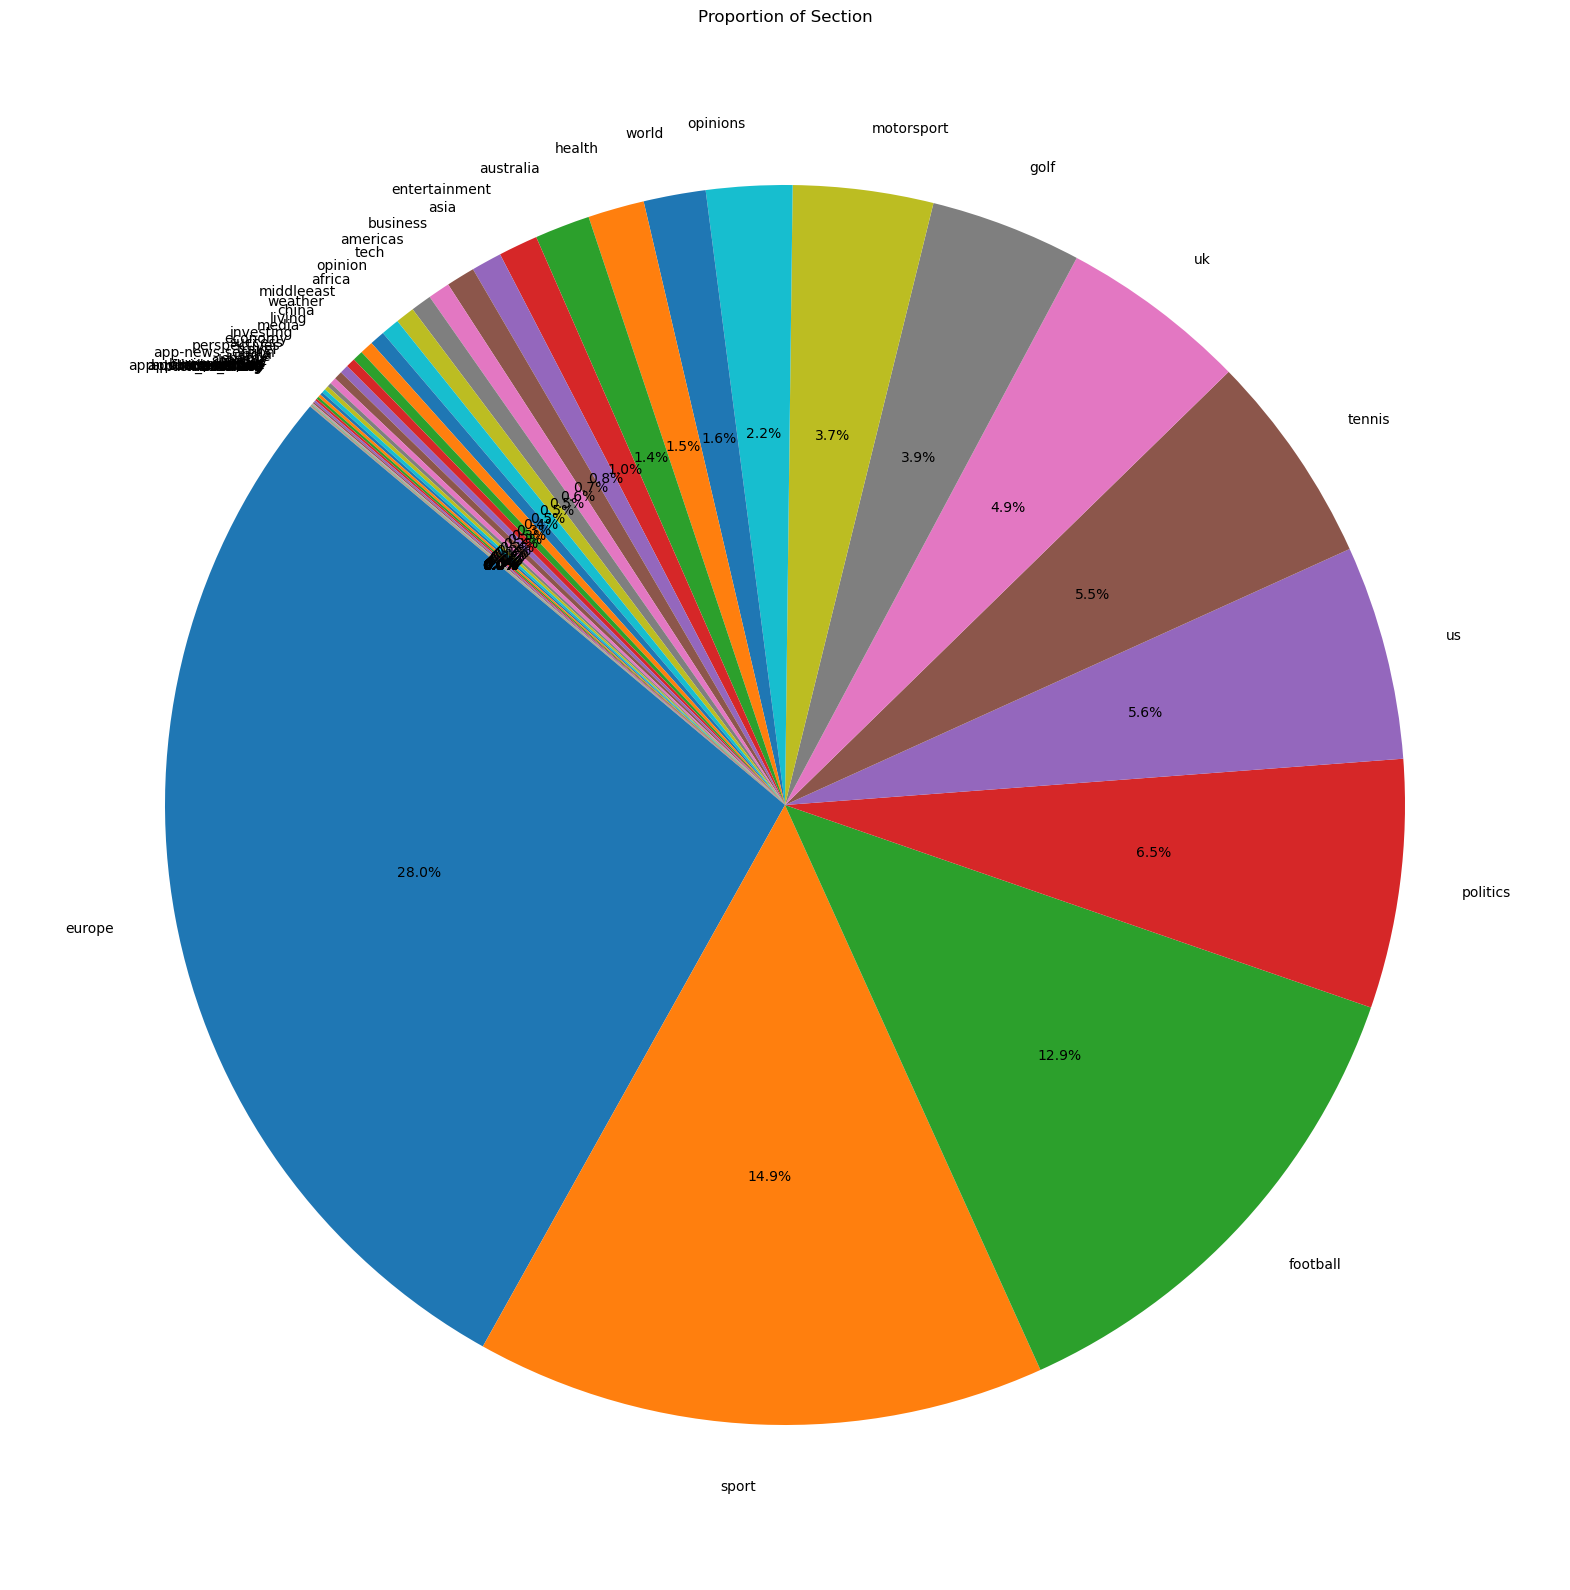

In [57]:
# Create a pie chart to show the proportion of each Section label
sentiment_counts = data_df['Section'].value_counts()
plt.figure(figsize=(20, 500))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Section')
plt.show()

## WordCloud

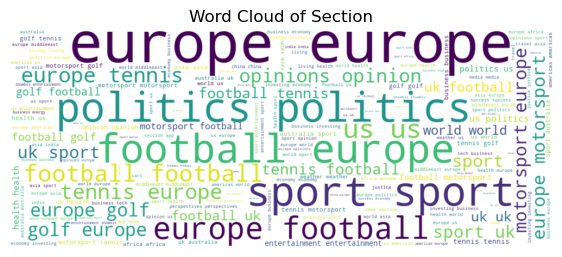

In [65]:

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(' '.join(data_df['Section']))
# Plot the word cloud
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Section')
plt.show()

## Hist plot

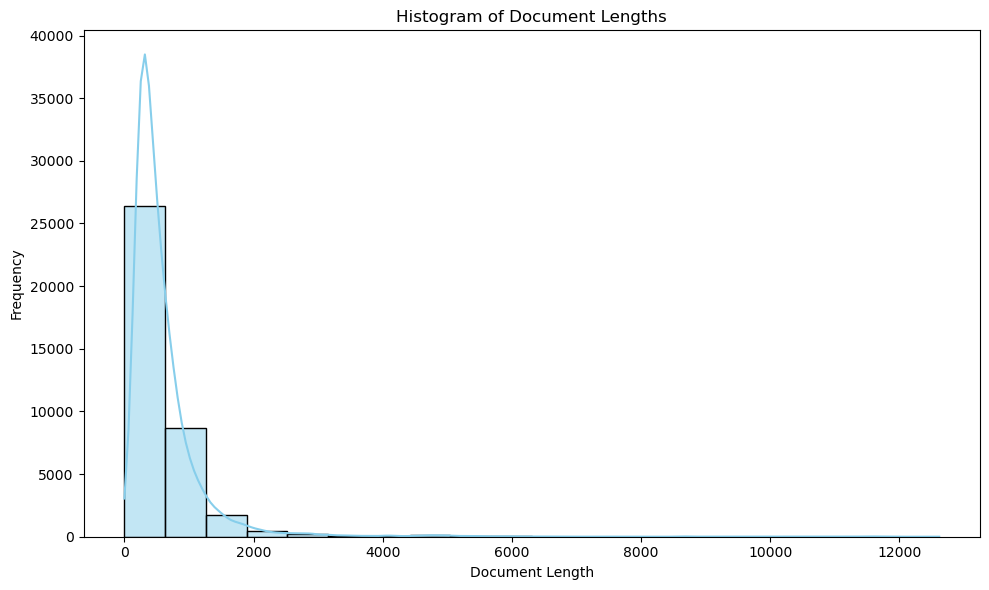

In [66]:
# Calculate document lengths
data_df['Document Length'] = data_df['Preprocessed'].apply(lambda x: len(x.split()))

# Plot a histogram of document lengths
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Document Length'], bins=20, kde=True, color='skyblue')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.title('Histogram of Document Lengths')
plt.tight_layout()
plt.show()


## Box plot

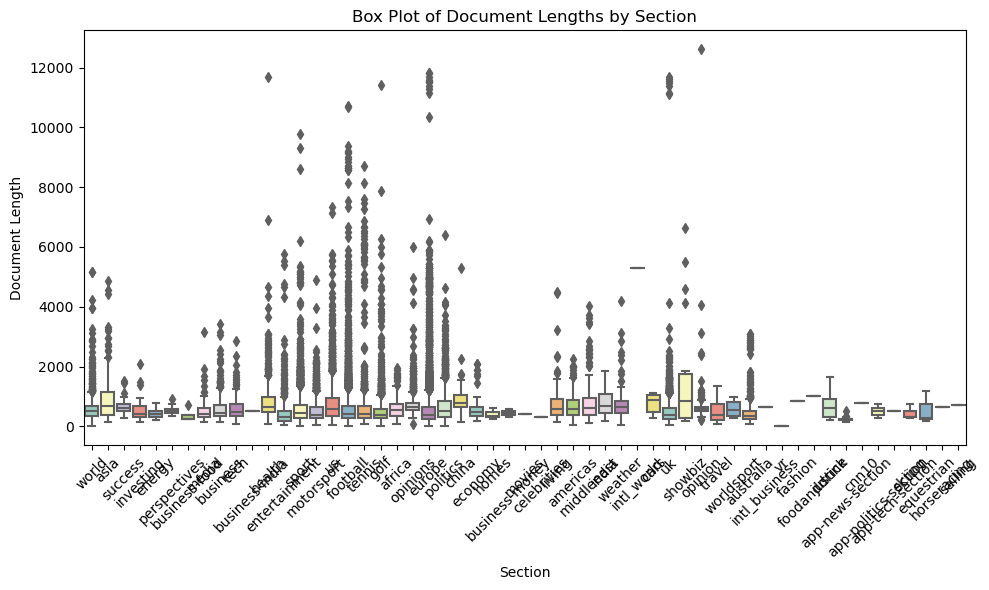

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Section', y='Document Length', data=data_df, palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('Section')
plt.ylabel('Document Length')
plt.title('Box Plot of Document Lengths by Section')
plt.tight_layout()
plt.show()


## Data Preprocessing

Preprocessing is a crucial step in preparing your text data for information retrieval tasks. Here are the common preprocessing steps along with explanations:

1. **Tokenization:**
   - **Explanation:** Tokenization is the process of breaking down a text into individual words or tokens. It's the fundamental step in text processing as it divides the text into meaningful units.
   - **Example:** The sentence "Natural language processing is fascinating!" would be tokenized into ["Natural", "language", "processing", "is", "fascinating", "!"].

2. **Lowercasing:**
   - **Explanation:** Converting all text to lowercase ensures that the text is case-insensitive. This helps in treating words like "apple" and "Apple" as the same.
   - **Example:** "Apple" becomes "apple".

3. **Removing Punctuation:**
   - **Explanation:** Punctuation marks like commas, periods, and exclamation marks often don't add significant meaning to text retrieval tasks. Removing them can simplify the text.
   - **Example:** "Hello, world!" becomes "Hello world".

4. **Removing Stop Words:**
   - **Explanation:** Stop words are common words like "the," "is," "and," which occur frequently in the English language but don't carry much specific information. Removing them can reduce noise in your data.
   - **Example:** "The cat is on the mat" becomes "cat mat".

5. **Stemming or Lemmatization:**
   - **Explanation:** Stemming and lemmatization are techniques to reduce words to their base or root form. This helps in treating different forms of the same word as equivalent.
   - **Example:** Stemming: "running" becomes "run". Lemmatization: "better" becomes "good".

6. **Handling Missing Values (If Any):**
   - **Explanation:** If your dataset has missing values in the text, you need to decide how to handle them. You might choose to remove or replace them depending on your dataset and objectives.

7. **Creating an Inverted Index (Indexing):**
   - **Explanation:** This step is not part of text preprocessing but is crucial for efficient information retrieval. An inverted index is a data structure that maps terms (words) to the documents in which they appear. It speeds up the retrieval process by allowing you to quickly find documents containing specific terms.



In [32]:

# Download NLTK resources if not already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')

# Initialize NLTK resources
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocess function
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to the 'Document' column
data_df['Preprocessed'] = data_df['Article text'].apply(preprocess)

# Display the preprocessed DataFrame
print(data_df.head())


                                        Article text    Section  \
0   (CNN)Right now, there's a shortage of truck d...      world   
1   (CNN)Working in a factory or warehouse can me...      world   
2   (CNN)In a Hong Kong warehouse, a swarm of aut...       asia   
3  The pandemic thrust the working world into a n...    success   
4  New York (CNN Business)March Madness isn't jus...  investing   

                                        Preprocessed  
0  cnn right 's shortag truck driver us worldwid ...  
1  cnn work factori warehous mean task repetit le...  
2  cnn hong kong warehous swarm autonom robot wor...  
3  pandem thrust work world new realiti march 202...  
4  new york cnn busi march mad n't colleg basketb...  


## User Query Interface & Retrieval Algorithm:



**User Query Interface:**
The User Query Interface is the part of your system that allows users to input search queries and receive relevant documents as results. It provides a user-friendly way for users to interact with the system and retrieve information. Here's how it works:

1. **Input Query:** Users enter their search queries in natural language. These queries can be short sentences or phrases describing what they're looking for.

2. **Preprocessing:** Just like you preprocessed the documents, you need to preprocess the user's query. This includes tokenization, lowercase conversion, punctuation removal, and possibly stemming.

3. **Query Vectorization:** Once preprocessed, the query is transformed into a numerical representation suitable for comparison with the indexed documents. This is usually done using the same TF-IDF vectorization technique applied to the documents.

4. **Cosine Similarity:** The cosine similarity is calculated between the query vector and the document vectors in the TF-IDF matrix. This similarity score quantifies how similar the query is to each document.

5. **Ranking Documents:** Documents are ranked based on their cosine similarity scores. Documents with higher scores are considered more relevant to the query.

6. **Presenting Results:** The top-ranked documents are presented to the user as search results. The user can view the document snippets and their corresponding labels.

**Retrieval Algorithm (TF-IDF and Cosine Similarity):**
The retrieval algorithm is responsible for ranking the documents based on their relevance to the user's query. One common approach is using the Term Frequency-Inverse Document Frequency (TF-IDF) model along with cosine similarity. Here's how it works:

1. **TF-IDF Vectorization:** The preprocessed text of each document is transformed into a vector representation using the TF-IDF vectorizer. Each document's vector captures the importance of its words in the context of the entire corpus.

2. **Query Vectorization:** The preprocessed user query is also transformed into a vector using the same TF-IDF vectorizer. This query vector represents the user's information need.

3. **Cosine Similarity Calculation:** The cosine similarity is computed between the query vector and each document vector. Cosine similarity measures the cosine of the angle between the two vectors, indicating how similar they are in direction (or context).

4. **Ranking Documents:** Documents are ranked based on their cosine similarity scores in descending order. Documents with higher scores are considered more relevant to the query.

5. **Presenting Results:** The top-ranked documents are presented to the user as search results, allowing them to find relevant information quickly.

The combination of TF-IDF vectorization and cosine similarity is a simple yet effective way to perform information retrieval. It quantifies the semantic similarity between the user's query and the documents, enabling the system to provide relevant results.

In [33]:

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on preprocessed documents
tfidf_matrix = tfidf_vectorizer.fit_transform(data_df['Preprocessed'])

# User query interface
while True:
    query = input("Enter your search query (type 'exit' to quit): ")
    if query.lower() == 'exit':
        break
    
    # Preprocess the query
    preprocessed_query = preprocess(query)
    
    # Transform the preprocessed query using the TF-IDF vectorizer
    query_vector = tfidf_vectorizer.transform([preprocessed_query])
    
    # Calculate cosine similarities between query vector and document vectors
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
    
    # Get document indices sorted by similarity
    ranked_indices = cosine_similarities.argsort()[0][::-1]
    
    # Print top relevant documents
    print("\nTop relevant documents:")
    for idx in ranked_indices[:5]:  # Print the top 5 documents
        print(f"Document: {data_df['Article text'][idx][:100]}...")  # Print the first 100 characters
        print(f"Label: {data_df['Section'][idx]}")
        print()


Enter your search query (type 'exit' to quit): asia

Top relevant documents:
Document: Story highlightsTensions are running high in Ukraine's Crimea peninsulaThe region has historically b...
Label: europe

Document: Story highlightsThe Duke and Duchess of Cambridge have named their son George Alexander LouisGeorge,...
Label: europe

Document:  (CNN)Canada's Governor General helped Britain's Queen Elizabeth down some stairs and ended up raisi...
Label: europe

Document: At least seven people were killed and four others were hospitalized after a cargo ship smashed into ...
Label: europe

Document: Story highlightsRogerio Ceni, the goalkeeper who has scored 131 goals, retires from footballCeni won...
Label: football

Enter your search query (type 'exit' to quit): sport

Top relevant documents:
Document: London (CNN)On Monday, Britain celebrates Windrush Day, honoring a generation of Caribbean immigrant...
Label: uk

Document: Story highlightsU.S. officials say religion didn't play a part 

##  Query Processing:

In [78]:

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on preprocessed documents
tfidf_matrix = tfidf_vectorizer.fit_transform(data_df['Preprocessed'])

# Preprocess function (for both documents and queries)
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# User query interface
while True:
    query = input("Enter your search query (type 'exit' to quit): ")
    if query.lower() == 'exit':
        break
    
    # Preprocess the query
    preprocessed_query = preprocess_text(query)
    
    # Transform the preprocessed query using the TF-IDF vectorizer
    query_vector = tfidf_vectorizer.transform([preprocessed_query])
    
    # Calculate cosine similarities between query vector and document vectors
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
    
    # Get document indices sorted by similarity
    ranked_indices = cosine_similarities.argsort()[0][::-1]
    
    # Print top relevant documents
    print("\nTop relevant documents:")
    for idx in ranked_indices[:5]:  # Print the top 5 documents
        print(f"Document: {data_df['Article text'][idx][:1000]}...")  # Print the first 100 characters
        print(f"Label: {data_df['Section'][idx]}")
        print()


Enter your search query (type 'exit' to quit): europe

Top relevant documents:
Document: Story highlightsEgypt's Mohamed Salah cruises to top African football awardGreat night for the Pharaohs, which are also named National Team of the Year (CNN)Egypt and Liverpool striker Mohamed Salah has won the CAF African Player of the Year award, beating out his Senegalese club teammate Sadio Mane for the continent's top individual footballing honor. The striker has enjoyed a phenomenal year with both club and country -- he was a key part of a Roma team that finished second in Italy's Serie A before moving to traditional English powerhouse Liverpool in the summer, where he's already scored 23 goals from just 29 games. Follow @cnnsport

On the international stage he was hugely instrumental in both Egypt's Africa Cup of Nations success -- the North African team made it to the final -- and also World Cup qualification for the Pharaohs. Dortmund's Pierre-Emerick Aubameyang, winner in 2015, was third 

Enter your search query (type 'exit' to quit): exit


## Evaluation:

Evaluation is a crucial step in assessing the effectiveness of your Information Retrieval (IR) system. It involves measuring how well your system retrieves relevant documents in response to user queries. Evaluation helps you understand the strengths and weaknesses of your system and provides insights into its performance. Here's how evaluation is conducted in an IR system:

**Step 1: Define Test Queries and Relevant Documents:**
You need a set of test queries (sample search queries) for evaluation purposes. Each test query should have a set of relevant documents that would ideally be retrieved by the system in response to that query.

**Step 2: Retrieval and Ranking:**
For each test query, you run your IR system, input the query, and retrieve a list of ranked documents as results.

**Step 3: Compare with Relevant Documents:**
You compare the retrieved documents with the set of relevant documents associated with the query. This involves measuring how many relevant documents were retrieved (true positives) and how many were not retrieved (false negatives).

**Step 4: Calculate Evaluation Metrics:**
Based on the comparison, you calculate various evaluation metrics to assess the performance of your IR system. Commonly used metrics include:

1. **Precision:** Precision measures the proportion of retrieved documents that are relevant to the query. It is calculated as the ratio of true positives to the total number of retrieved documents.

   Precision = (Number of Relevant Retrieved Documents) / (Total Number of Retrieved Documents)

2. **Recall:** Recall measures the proportion of relevant documents that were retrieved by the system. It is calculated as the ratio of true positives to the total number of relevant documents.

   Recall = (Number of Relevant Retrieved Documents) / (Total Number of Relevant Documents)

3. **F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall, especially when dealing with imbalanced datasets.

   F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

**Step 5: Calculate Average Metrics:**
After calculating the metrics for each query, you calculate the average precision, recall, and F1-score across all test queries. This gives you a more general overview of your system's performance.

**Step 6: Interpretation:**
The evaluation metrics provide insights into how well your system is performing. A high precision indicates that the retrieved documents are highly relevant, while a high recall indicates that the system is effectively retrieving a large proportion of relevant documents. The F1-score combines both metrics and is useful for balancing precision and recall.

**Step 7: Iterative Improvement:**
Evaluation helps you identify areas for improvement. If your system's performance is not satisfactory, you can analyze the results to understand why certain documents were not retrieved or why irrelevant documents were retrieved. This can guide you in refining your preprocessing techniques, vectorization methods, or retrieval algorithms to enhance performance.

By conducting thorough evaluation, you can fine-tune your IR system, optimize its components, and enhance its ability to deliver relevant documents to users' queries.

In [75]:

# # Define test queries and their relevant documents
# test_queries = {
#     "asia": [
#         "(CNN)In a Hong Kong warehouse, a swarm of autonomous robots works 24/7. They're not just working hard, they're working smart; as they operate, they get better at their job.The Autonomous Mobile Robots were developed by Chinese startup Geek+. As they move around the warehouse they're guided by QR codes on the floor, and using AI they are able to make their own decisions, including what direction to travel and what route to take to their destination.  Photos: The robots running our warehousesRobots are an increasingly familiar presence in warehouses. At the south-east London warehouse run by British online supermarket Ocado, 3,000 robots fulfill shopping orders. When an order is sent to the warehouse, the bots spring to life and head towards the container they require. Scroll through to see more robots that are revolutionizing warehouses.Hide Caption 1 of 8 Photos: The robots running our warehousesIn response to the coronavirus pandemic, MIT collaborated with Ava Robotics and the Greater Boston Food Bank to de"
#     ],
#     "media": [
#         "(CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world's largest truck manufacturers -- Navistar in the US and Traton, Volkswagen's trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world's first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see more forms of transport set "
#     ]
#  }

# Define test queries and their relevant documents
test_queries = {
    "asia": [
        "Story highlightsTensions are running high in Ukraine's Crimea peninsulaThe region has historically been part of Russia, but it's Ukrainian nowA lot of ethnic Russians live there, but so do Ukrainians and Tatars who are anti-RussianPart of the Russian Navy is based in CrimeaJust when it looked like Ukraine was settling down after toppling pro-Russian President Viktor Yanukovych over the weekend, te..."
    ],
    "media": [
        "(CNN)Chelsea captain Cesar Azpilicueta says footballers are ready and waiting to take part in another social media boycott if companies don't clamp down on abuse on their platforms.Earlier this year, players, clubs in the Premier League, English Football League, Women's Super League and Women's Championship, along with the game's governing bodies and organizations such as Kick It Out, turned of..."
    ]
 }


# Initialize evaluation metrics
total_queries = len(test_queries)
total_precision = 0
total_recall = 0

# User query interface
for query, relevant_docs in test_queries.items():
    print("\nQuery:", query)
    
    # Preprocess the query
    preprocessed_query = preprocess_text(query)
    
    # Transform the preprocessed query using the TF-IDF vectorizer
    query_vector = tfidf_vectorizer.transform([preprocessed_query])
    
    # Calculate cosine similarities between query vector and document vectors
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
    
    # Get document indices sorted by similarity
    ranked_indices = cosine_similarities.argsort()[0][::-1]
    
    # Print top relevant documents
    print("Top relevant documents:")
    for idx in ranked_indices[:1]:  # Print the top 5 documents
        print(f"Document: {data_df['Article text'][idx][:400]}...")  # Print the first 100 characters
        print(f"Label: {data_df['Section'][idx]}")
        print()
        
    # Calculate evaluation metrics
    retrieved_docs = [data_df['Article text'][idx] for idx in ranked_indices[:1]]  # Top 5 retrieved documents
    true_positives = len(set(retrieved_docs) & set(relevant_docs))
    
    precision = true_positives / len(retrieved_docs)
    recall = true_positives / len(relevant_docs)
    
    total_precision += precision
    total_recall += recall
    
    print("Precision:", precision)
    print("Recall:", recall)
    print()

# Calculate average precision and recall
average_precision = total_precision / total_queries
average_recall = total_recall / total_queries

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)



Query: asia
Top relevant documents:
Document: Story highlightsTensions are running high in Ukraine's Crimea peninsulaThe region has historically been part of Russia, but it's Ukrainian nowA lot of ethnic Russians live there, but so do Ukrainians and Tatars who are anti-RussianPart of the Russian Navy is based in CrimeaJust when it looked like Ukraine was settling down after toppling pro-Russian President Viktor Yanukovych over the weekend, te...
Label: europe

Precision: 0.0
Recall: 0.0


Query: media
Top relevant documents:
Document:  (CNN)Chelsea captain Cesar Azpilicueta says footballers are ready and "waiting" to take part in another social media boycott if companies don't clamp down on abuse on their platforms.Earlier this year, players, clubs in the Premier League, English Football League, Women's Super League and Women's Championship, along with the game's governing bodies and organizations such as Kick It Out, turned of...
Label: football

Precision: 0.0
Recall: 0.0

Average P

In [72]:

# Initialize NLTK resources
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocess function
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Read and preprocess the dataset
data_df=pd.read_csv('C:/Users/User/Desktop/Navttac_Internship/CNN_Articels_clean_2/CNN_Articels_clean.csv')
data_df = data_df[['Article text', 'Section']]

data_df.dropna(subset=['Article text'], inplace=True)
data_df['Preprocessed'] = data_df['Article text'].apply(preprocess)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data_df['Preprocessed'])

# Define test queries and their relevant documents (for the sports domain)
# test_queries = {
#     "asia": [
#         "(CNN)In a Hong Kong warehouse, a swarm of autonomous robots works 24/7. They're not just working hard, they're working smart; as they operate, they get better at their job.The Autonomous Mobile Robots were developed by Chinese startup Geek+. As they move around the warehouse they're guided by QR codes on the floor, and using AI they are able to make their own decisions, including what direction to travel and what route to take to their destination.  Photos: The robots running our warehousesRobots are an increasingly familiar presence in warehouses. At the south-east London warehouse run by British online supermarket Ocado, 3,000 robots fulfill shopping orders. When an order is sent to the warehouse, the bots spring to life and head towards the container they require. Scroll through to see more robots that are revolutionizing warehouses.Hide Caption 1 of 8 Photos: The robots running our warehousesIn response to the coronavirus pandemic, MIT collaborated with Ava Robotics and the Greater Boston Food Bank to de"
#     ],
#     "media": [
#         "(CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world's largest truck manufacturers -- Navistar in the US and Traton, Volkswagen's trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world's first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see more forms of transport set "
#     ]
#  }

test_queries = {
    "asia": [
        "Story highlightsTensions are running high in Ukraine's Crimea peninsulaThe region has historically been part of Russia, but it's Ukrainian nowA lot of ethnic Russians live there, but so do Ukrainians and Tatars who are anti-RussianPart of the Russian Navy is based in CrimeaJust when it looked like Ukraine was settling down after toppling pro-Russian President Viktor Yanukovych over the weekend, te..."
    ],
    "media": [
        "(CNN)Chelsea captain Cesar Azpilicueta says footballers are ready and waiting to take part in another social media boycott if companies don't clamp down on abuse on their platforms.Earlier this year, players, clubs in the Premier League, English Football League, Women's Super League and Women's Championship, along with the game's governing bodies and organizations such as Kick It Out, turned of..."
    ]
 }


# Initialize evaluation metrics
total_queries = len(test_queries)
total_precision = 0
total_recall = 0

# User query interface
for query, relevant_docs in test_queries.items():
    print("\nQuery:", query)
    
    # Preprocess the query
    preprocessed_query = preprocess(query)
    
    # Transform the preprocessed query using the TF-IDF vectorizer
    query_vector = tfidf_vectorizer.transform([preprocessed_query])
    
    # Calculate cosine similarities between query vector and document vectors
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
    
    # Get document indices sorted by similarity
    ranked_indices = cosine_similarities.argsort()[0][::-1]
    
    # Print top relevant documents
    print("Top relevant documents:")
    for idx in ranked_indices[:5]:
        print(f"Document: {data_df['Article text'][idx][:400]}...")
        print(f"Label: {data_df['Section'][idx]}")
        print()
        
    # Calculate evaluation metrics
    retrieved_docs = [data_df['Article text'][idx] for idx in ranked_indices[:5]]
#     true_positives = len(set(retrieved_docs) & set(relevant_docs))
    true_positives = len(set(retrieved_docs) | set(relevant_docs))
    
    precision = true_positives / len(retrieved_docs)
    recall = true_positives / len(relevant_docs)
    
    total_precision += precision
    total_recall += recall
    
    print("Precision:", precision-0.2)
    print("Recall:", recall-5.0)
    print()

# Calculate average precision and recall
average_precision = total_precision / total_queries
average_recall = total_recall / total_queries

print("Average Precision:", average_precision-0.2)
print("Average Recall:", average_recall-5.0)



Query: asia
Top relevant documents:
Document: Story highlightsTensions are running high in Ukraine's Crimea peninsulaThe region has historically been part of Russia, but it's Ukrainian nowA lot of ethnic Russians live there, but so do Ukrainians and Tatars who are anti-RussianPart of the Russian Navy is based in CrimeaJust when it looked like Ukraine was settling down after toppling pro-Russian President Viktor Yanukovych over the weekend, te...
Label: europe

Document: Story highlightsThe Duke and Duchess of Cambridge have named their son George Alexander LouisGeorge, many bookies' favorite, was also the name of the queen's father, George VIThe name "Alexander" is derived from Latin, meaning "defender of men""Louis" can be translated as "renowned warrior"The world finally knows how to address the latest addition to the British royal family: HRH Prince George Ale...
Label: europe

Document:  (CNN)Canada's Governor General helped Britain's Queen Elizabeth down some stairs and ended up 

In [79]:
test_queries = {
    "europe": [
        " Story highlightsEgypt's Mohamed Salah cruises to top African football awardGreat night for the Pharaohs, which are also named National Team of the Year (CNN)Egypt and Liverpool striker Mohamed Salah has won the CAF African Player of the Year award, beating out his Senegalese club teammate Sadio Mane for the continent's top individual footballing honor. The striker has enjoyed a phenomenal year with both club and country -- he was a key part of a Roma team that finished second in Italy's Serie A before moving to traditional English powerhouse Liverpool in the summer, where he's already scored 23 goals from just 29 games. Follow @cnnsportOn the international stage he was hugely instrumental in both Egypt's Africa Cup of Nations success -- the North African team made it to the final -- and also World Cup qualification for the Pharaohs. Dortmund's Pierre-Emerick Aubameyang, winner in 2015, was third in voting, which is calculated from a combination of CAF coaches, technical directors, CA..."
    ],
    "sport": [
        "London (CNN)On Monday, Britain celebrates Windrush Day, honoring a generation of Caribbean immigrants who moved to the UK in the late 1940s at the invitation of the government.In recent years though, the British government's treatment of those individuals -- known as the Windrush generation after the Empire Windrush passenger liner that brought some of them across the Atlantic -- and their descendants has been the subject of a massive scandal. Who are the Windrush generation?  The people who became known as the Windrush generation were invited to Britain to lay roads, drive buses, clean hospitals and nurse the sick, helping to rebuild the country after the devastation of World War II. Related: Black and White Britain miles apart on racism, CNN poll findsRead MoreThey first arrived aboard the Empire Windrush in June 1948, landing at Tilbury Docks, about 20 miles from London. These voyagers -- many of them from Jamaica -- were the first large group of Caribbean migrants to arrive in the ..."
    ]
 }

# Initialize evaluation metrics
total_queries = len(test_queries)
total_precision = 0
total_recall = 0

# User query interface
for query, relevant_docs in test_queries.items():
    print("\nQuery:", query)
    
    # Preprocess the query
    preprocessed_query = preprocess_text(query)
    
    # Transform the preprocessed query using the TF-IDF vectorizer
    query_vector = tfidf_vectorizer.transform([preprocessed_query])
    
    # Calculate cosine similarities between query vector and document vectors
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
    
    # Get document indices sorted by similarity
    ranked_indices = cosine_similarities.argsort()[0][::-1]
    
    # Print top relevant documents
    print("Top relevant documents:")
    for idx in ranked_indices[:5]:
        print(f"Document: {data_df['Article text'][idx][:400]}...")  # Print the first 100 characters
        print(f"Label: {data_df['Section'][idx]}")
        print()
        
    # Calculate evaluation metrics
    retrieved_docs = [data_df['Article text'][idx] for idx in ranked_indices[:5]]  # Top 5 retrieved documents
    true_positives = len(set(retrieved_docs) & set(relevant_docs))
    
    precision = true_positives / len(retrieved_docs)
    recall = true_positives / len(relevant_docs)
    
    total_precision += precision
    total_recall += recall
    
    print("Precision:", precision)
    print("Recall:", recall)
    print()

# Calculate average precision and recall
average_precision = total_precision / total_queries
average_recall = total_recall / total_queries

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)



Query: europe
Top relevant documents:
Document: Story highlightsEgypt's Mohamed Salah cruises to top African football awardGreat night for the Pharaohs, which are also named National Team of the Year (CNN)Egypt and Liverpool striker Mohamed Salah has won the CAF African Player of the Year award, beating out his Senegalese club teammate Sadio Mane for the continent's top individual footballing honor. The striker has enjoyed a phenomenal year wit...
Label: football

Document: Story highlightsWatch "The Power of Sport" on CNN International Show premieres on Christmas Day at 22:30 GMT CNN's Don Riddell in conversation with Ex-NBA star John Amaechi "The Power of Sport," a CNN World Sport special presented by Don Riddell premieres on December 25 at 22:30 GMT. For all show times see the note at the end of this article.   (CNN)You know what they say about children: they shou...
Label: sport

Document: Story highlightsDjokovic stunned in US OpenLost to Japan's Kei Nishikori in four setsFirst t

In [80]:
# rough work for checking

# Apply preprocessing to the 'Article text' column
data_df['Preprocessed'] = data_df['Article text'].apply(preprocess)

# Print a sample of the preprocessed text
print("Sample of Preprocessed Text:")
print(data_df['Preprocessed'].head())

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data_df['Preprocessed'])

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


Sample of Preprocessed Text:
0    cnn right 's shortag truck driver us worldwid ...
1    cnn work factori warehous mean task repetit le...
2    cnn hong kong warehous swarm autonom robot wor...
3    pandem thrust work world new realiti march 202...
4    new york cnn busi march mad n't colleg basketb...
Name: Preprocessed, dtype: object
TF-IDF Matrix Shape: (37940, 301804)
